# **TP1 Supervised Learning with K Nearest Neighbors**
----

In [0]:
# import library
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier as KNNs
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import itertools
import time


## **1. Dataset Exploration & Visualization**

### Load MNIST dataset

In [0]:
# Load data
mnist = fetch_openml('mnist_784') 

In [0]:
print(mnist.DESCR)

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [0]:
print("Shape of data : ", mnist.data.shape)
print("Shape of target : ",mnist.target.shape)

Shape of data :  (70000, 784)
Shape of target :  (70000,)


In [0]:
target_list = np.unique(mnist.target)
print(target_list)

['0' '1' '2' '3' '4' '5' '6' '7' '8' '9']


### Visualize dataset

Target =  5
Data in shape of (28,28) : 
 [[[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
     0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
  [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
     0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
  [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
     0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
  [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
     0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
  [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
     0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
  [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   3.  18.
    18.  18. 126. 136. 175.  26. 166. 255. 247. 127.   0.   0.   0.   0.]
  [  0.   0.   0.   0.   0.   0.   0.   0.  30.  36.  94. 154. 170. 253.
   2

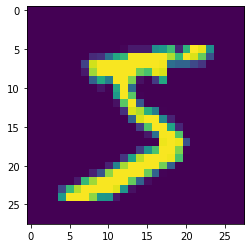

In [0]:
print("Target = ", mnist.target[0])
print("Data in shape of (28,28) : \n",mnist.data[0].reshape(1,28,28))
plt.imshow(mnist.data[0].reshape(28,28))
plt.show()

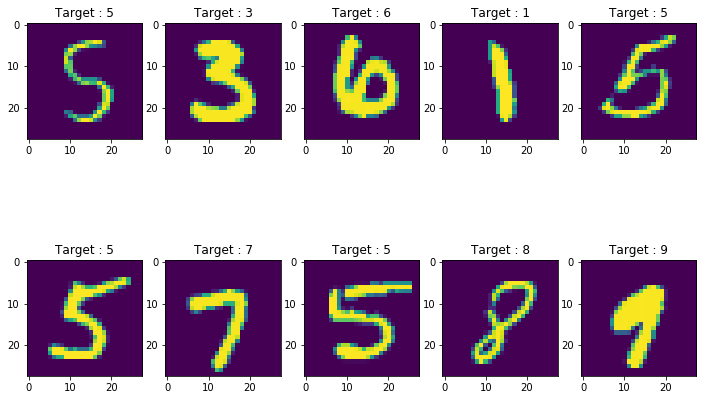

In [0]:
plt.figure(figsize=(12,8))
for i in range(10):
    idx = np.random.randint(len(mnist.data))
    plt.subplot(2,5,i+1)
    plt.imshow(mnist.data[idx].reshape(28,28))
    plt.title("Target : {}".format(mnist.target[idx]))
plt.show()

## **2. K-Nearest Neighbors method (K-NN)**

### Shuffle data and take a small batch of 5000 samples

In [0]:
# shuffle & print shape 
# data is not normalize
indexes = random.sample(range(70000),5000)
images = mnist.data[indexes].reshape((-1,28,28))
data = mnist.data[indexes]
labels = mnist.target[indexes]
print("Shape of training images : ", images.shape)
print("Shape of training data : ", data.shape)
print("Shape of label : ", labels.shape)

Shape of training images :  (5000, 28, 28)
Shape of training data :  (5000, 784)
Shape of label :  (5000,)


### Split data

In [0]:
X_train, X_test, y_train, y_test = train_test_split(data,labels,train_size =0.8)
print("Training data shape : ", X_train.shape)
print("Training target shape : ", y_train.shape)
print("Testing data shape : ", X_test.shape)
print("Testing target shape : ", y_test.shape)

Training data shape :  (4000, 784)
Training target shape :  (4000,)
Testing data shape :  (1000, 784)
Testing target shape :  (1000,)


### Train k-NN classifier with k = 10

In [0]:
%%time
n_neighbors = 10
clf = KNNs(n_neighbors)
clf.fit(X_train,y_train)

CPU times: user 154 ms, sys: 1.02 ms, total: 155 ms
Wall time: 155 ms


### Plot predictions...

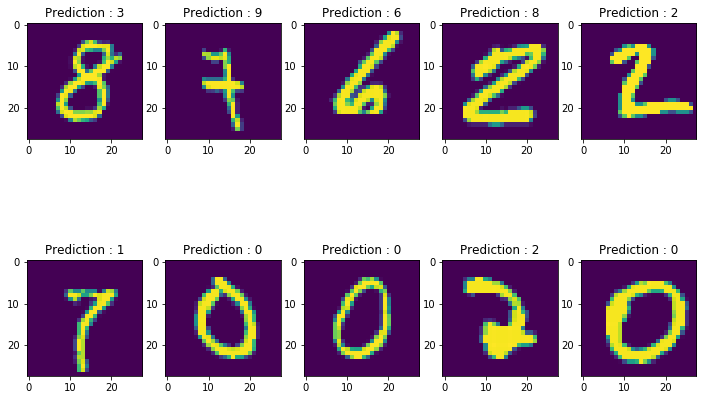

CPU times: user 1.23 s, sys: 14 ms, total: 1.24 s
Wall time: 1.25 s


In [0]:
%%time
plt.figure(figsize=(12,8))
for i in range(10):
    idx = np.random.randint(len(X_test))
    y_pred = clf.predict([X_test[idx]])
    plt.subplot(2,5,i+1)
    plt.imshow(X_test[idx].reshape(28,28))
    plt.title("Prediction : {}".format(y_pred[0]))
plt.show()

### Compute manually score

In [0]:
def get_score(y_true,y_pred):
    """
    This function computes the correct prediction / total prediction 
    """
    correct = 0
    for i in range(len(y_true)):
        if y_true[i] == y_pred[i]:
            correct += 1
    print("Nb of true prediction : {}/{}".format(correct,len(y_true)))
    return correct / len(y_true)

In [0]:
y_pred = clf.predict(X_test)
score  = get_score(y_test,y_pred)
print("Score = ",score)

Nb of true prediction : 931/1000
Score =  0.931


### Verify again with clf.score...

In [0]:
clf.score(X_test,y_test)

0.931

### Classification report 

In [0]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       115
           1       0.91      1.00      0.95       125
           2       0.98      0.88      0.93        92
           3       0.97      0.91      0.93       127
           4       0.97      0.88      0.93        77
           5       0.91      0.94      0.92        65
           6       0.98      0.97      0.97       100
           7       0.89      0.90      0.90        94
           8       0.93      0.85      0.89        99
           9       0.84      0.96      0.90       106

    accuracy                           0.93      1000
   macro avg       0.93      0.93      0.93      1000
weighted avg       0.93      0.93      0.93      1000



### Confusion matrix

In [0]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    """
    This function plots the confusion matrix of classfier
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Normalized confusion matrix


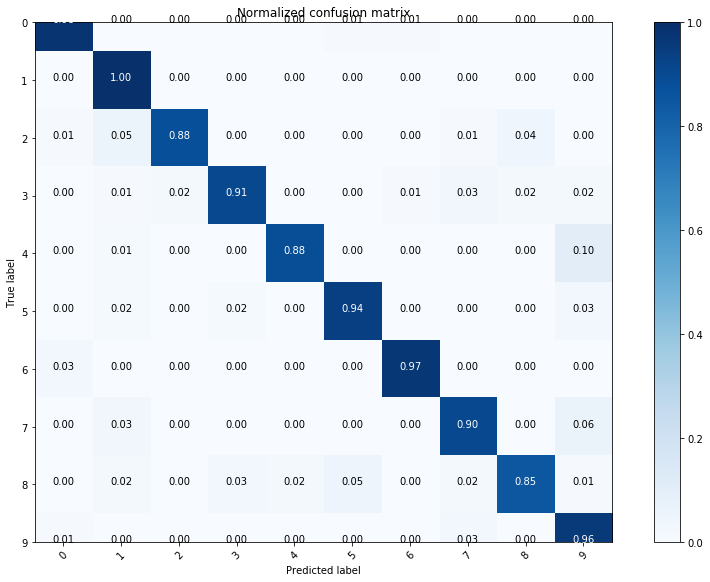

In [0]:
cm = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)
plt.figure(figsize=(12,8))
plot_confusion_matrix(cm, classes=target_list, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

## **3. Hyperparameter tuning for k-NN**

In [0]:
X_train, X_test, y_train, y_test = train_test_split(data,labels,train_size =0.8)

### ***3.1. Number of neighbors***

n_neigbors =  2 ...
n_neigbors =  3 ...
n_neigbors =  4 ...
n_neigbors =  5 ...
n_neigbors =  6 ...
n_neigbors =  7 ...
n_neigbors =  8 ...
n_neigbors =  9 ...
n_neigbors =  10 ...
n_neigbors =  11 ...
n_neigbors =  12 ...
n_neigbors =  13 ...
n_neigbors =  14 ...
n_neigbors =  15 ...
1 loop, best of 1: 6min 51s per loop


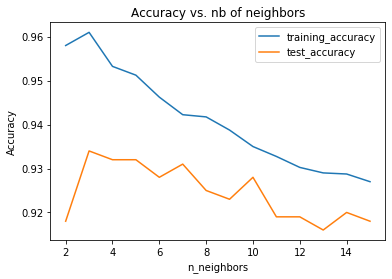

In [0]:
%%timeit -n1 -r1

training_accuracies = []
test_accuracies = []
neighbors_settings = np.arange(2,16,1)

for n_neighbors in neighbors_settings :
    print("n_neigbors = ",n_neighbors,"...")
    clf = KNNs(n_neighbors)
    clf.fit(X_train,y_train)
    training_accuracies.append(clf.score(X_train,y_train))
    test_accuracies.append(clf.score(X_test,y_test))
  
plt.plot(neighbors_settings, training_accuracies, label = "training_accuracy")
plt.plot(neighbors_settings, test_accuracies, label = "test_accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend(loc='best')
plt.title('Accuracy vs. nb of neighbors')
plt.savefig('TP1-acc-vs-neighbors.png')

### ***3.2. K-Fold***



**Use module sklearn.model_selection.cross_val_score**

In [0]:
%%time
cross_validation_accuracies = []
neighbors_settings = np.arange(2,16,1)

for n_neighbors in neighbors_settings :
    print("n_neigbors = ",n_neighbors,"...")
    clf = KNNs(n_neighbors)
    cv_scores = cross_val_score(clf,data,labels,cv=10,n_jobs=1)
    cross_validation_accuracies.append(cv_scores)

n_neigbors =  2 ...
n_neigbors =  3 ...
n_neigbors =  4 ...
n_neigbors =  5 ...
n_neigbors =  6 ...
n_neigbors =  7 ...
n_neigbors =  8 ...
n_neigbors =  9 ...
n_neigbors =  10 ...
n_neigbors =  11 ...
n_neigbors =  12 ...
n_neigbors =  13 ...
n_neigbors =  14 ...
n_neigbors =  15 ...
CPU times: user 7min 40s, sys: 159 ms, total: 7min 40s
Wall time: 7min 41s


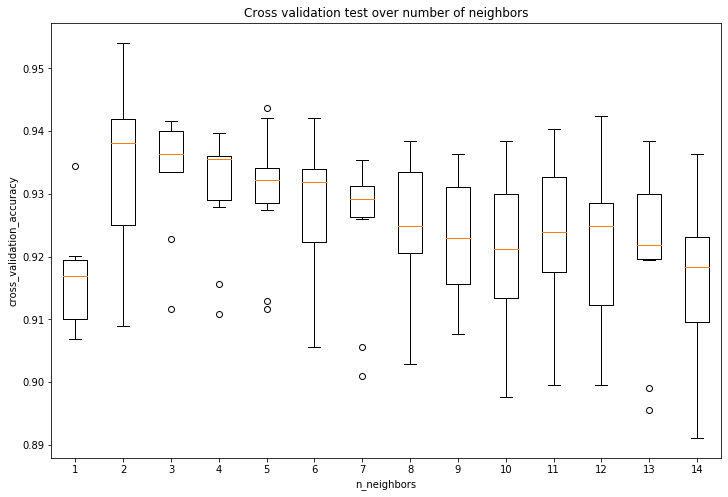

In [0]:
## PLOT
plt.figure(figsize=(12,8))
plt.boxplot(cross_validation_accuracies) 
plt.ylabel("cross_validation_accuracy")
plt.xlabel("n_neighbors")
# plt.legend()
plt.title("Cross validation test over number of neighbors")
plt.savefig('TP1-cross-val-acc-vs-neighbors.png')

**Use module sklearn.model_selection.KFold in order to compute scores**


In [0]:
%%time 
scores = []
neighbors_settings = np.arange(2,16,1)

for n_neighbors in neighbors_settings:
    print("=========================")
    print("n_neigbors = ",n_neighbors,"...")
    print("=========================")
    clf = KNNs(n_neighbors)
    kf = KFold(n_splits=10,shuffle=True,random_state=n_neighbors)
    print(kf)
    id_fold = 0
    k_fold_scores = []
    for train_index, test_index in kf.split(data):
        print("Fold num {}...training...".format(id_fold))
        X_train, X_test = data[train_index], data[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        clf.fit(X_train,y_train)
        score = clf.score(X_test,y_test)
        print("Test acc : ", score)
        k_fold_scores.append(score)
        id_fold += 1
    scores.append(k_fold_scores)
print("================= Fin ======================\n")

n_neigbors =  2 ...
KFold(n_splits=10, random_state=2, shuffle=True)
Fold num 0...training...
Test acc :  0.89
Fold num 1...training...
Test acc :  0.928
Fold num 2...training...
Test acc :  0.93
Fold num 3...training...
Test acc :  0.912
Fold num 4...training...
Test acc :  0.936
Fold num 5...training...
Test acc :  0.92
Fold num 6...training...
Test acc :  0.92
Fold num 7...training...
Test acc :  0.932
Fold num 8...training...
Test acc :  0.892
Fold num 9...training...
Test acc :  0.896
n_neigbors =  3 ...
KFold(n_splits=10, random_state=3, shuffle=True)
Fold num 0...training...
Test acc :  0.942
Fold num 1...training...
Test acc :  0.94
Fold num 2...training...
Test acc :  0.936
Fold num 3...training...
Test acc :  0.92
Fold num 4...training...
Test acc :  0.928
Fold num 5...training...
Test acc :  0.936
Fold num 6...training...
Test acc :  0.92
Fold num 7...training...
Test acc :  0.936
Fold num 8...training...
Test acc :  0.908
Fold num 9...training...
Test acc :  0.956
n_neigbor

Text(0.5, 0, 'n_neighbors')

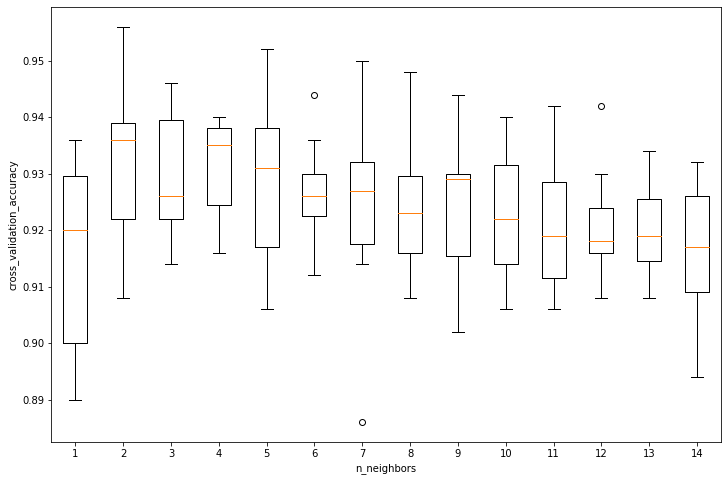

In [0]:
plt.figure(figsize=(12,8))
plt.boxplot(scores) 
plt.ylabel("cross_validation_accuracy")
plt.xlabel("n_neighbors")

### ***3.3. Split rate*** 


**Fix n_neighbors = 3, we change split_rate and print scores**

In [0]:
def get_rate(x):
    return round(0.5 + int(x) * 0.05,3)
for i in range(10):
    print(get_rate(i))

0.5
0.55
0.6
0.65
0.7
0.75
0.8
0.85
0.9
0.95


In [0]:
%%time
n_neighbors = 3
training_accuracies = []
test_accuracies = []
split_rates = [get_rate(i) for i in range(10)]
for split_rate in split_rates:
    print("Split_rate = {}...".format(split_rate))
    X_train, X_test, y_train, y_test = train_test_split(data,labels,train_size =split_rate)
    clf = KNNs(n_neighbors)
    print("Fitting model...")
    clf.fit(X_train,y_train)
    training_accuracies.append(clf.score(X_train,y_train))
    test_accuracies.append(clf.score(X_test,y_test))
    print("=====================================")

Split_rate = 0.5...
Fitting model...
Split_rate = 0.55...
Fitting model...
Split_rate = 0.6...
Fitting model...
Split_rate = 0.65...
Fitting model...
Split_rate = 0.7...
Fitting model...
Split_rate = 0.75...
Fitting model...
Split_rate = 0.8...
Fitting model...
Split_rate = 0.85...
Fitting model...
Split_rate = 0.9...
Fitting model...
Split_rate = 0.95...
Fitting model...
CPU times: user 3min 54s, sys: 48.9 ms, total: 3min 54s
Wall time: 3min 54s


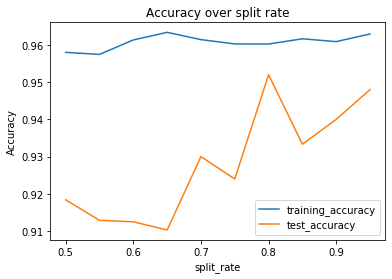

<Figure size 432x288 with 0 Axes>

In [0]:
## PLOT
plt.plot(split_rates, training_accuracies, label = "training_accuracy")
plt.plot(split_rates, test_accuracies, label = "test_accuracy")
plt.ylabel("Accuracy")
plt.xlabel("split_rate")
plt.legend(loc='best')
plt.title("Accuracy over split rate")
plt.show()
plt.savefig('TP1-acc-vs-split-rate.png')

### ***3.4. Size of training set***

In [0]:
%%time
training_scores = []
test_scores = []
training_times = []
data_size = np.array([1000,2000,5000,10000,20000,40000])
for size in data_size:
    print("Size of data : {} samples ...".format(size))
    # take a batch of dataset
    indexes = random.sample(range(70000),size)
    X2 = mnist.data[indexes]
    y2 = mnist.target[indexes]
    X2_train, X2_test, y2_train, y2_test = train_test_split(X2,y2,train_size =0.8)
    clf = KNNs(n_neighbors=3,n_jobs=-1)
    start = time.clock()
    clf.fit(X2_train,y2_train)
    exec_time = time.clock() -  start
    training_times.append(exec_time)
    print("Execution time : ",exec_time)
    print("Computing scores...")
    training_scores.append(clf.score(X2_train,y2_train))
    test_scores.append(clf.score(X2_test,y2_test))

Size of data : 1000 samples ...
Execution time :  0.010760000001027947
Computing scores...
Size of data : 2000 samples ...
Execution time :  0.0247029999991355
Computing scores...
Size of data : 5000 samples ...
Execution time :  0.12561899999855086
Computing scores...
Size of data : 10000 samples ...
Execution time :  0.3285550000000512
Computing scores...
Size of data : 20000 samples ...
Execution time :  1.059067000000141
Computing scores...
Size of data : 40000 samples ...
Execution time :  3.337985000000117
Computing scores...
CPU times: user 1h 12min 47s, sys: 1.61 s, total: 1h 12min 49s
Wall time: 36min 59s


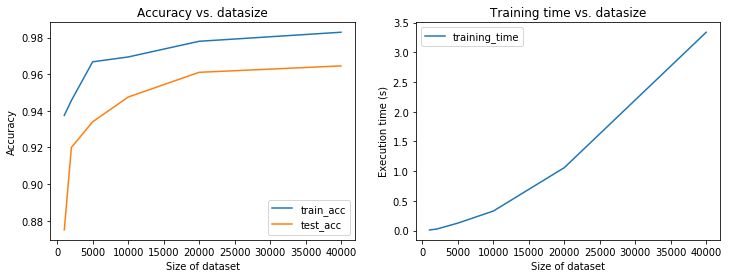

<Figure size 432x288 with 0 Axes>

In [0]:
## PLOT
plt.figure(figsize=(12,4))
plt.subplot(121)
plt.plot(data_size,training_scores, label='train_acc')
plt.plot(data_size,test_scores,label='test_acc')
plt.xlabel('Size of dataset')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.title("Accuracy vs. datasize")

plt.subplot(122)
plt.plot(data_size,training_times,label='training_time')
plt.xlabel('Size of dataset')
plt.ylabel('Execution CPU time (s)')
plt.legend(loc='best')
plt.title("Training time vs. datasize")

plt.show()
plt.savefig("TP1-acc-time-vs-datasize.png")

### ***3.5. Distance metrics***

In [0]:
%%time
X_train, X_test, y_train, y_test = train_test_split(data,labels,train_size =0.8)
n_neighbors = 10
training_scores = []
test_scores = []
print("===  Testing type of distance (p) ===")
for p in range(1,10):
    print("Metrics : Minkowski, p = ",p)
    clf = KNNs(n_neighbors=n_neighbors,p=p,metric='minkowski')
    clf.fit(X_train,y_train)
    training_scores.append(clf.score(X_train,y_train))
    test_scores.append(clf.score(X_test,y_test))

===  Testing type of distance (p) ===
Metrics : Minkowski, p =  1
Metrics : Minkowski, p =  2
Metrics : Minkowski, p =  3
Metrics : Minkowski, p =  4
Metrics : Minkowski, p =  5
Metrics : Minkowski, p =  6
Metrics : Minkowski, p =  7
Metrics : Minkowski, p =  8
Metrics : Minkowski, p =  9
CPU times: user 1h 22s, sys: 291 ms, total: 1h 22s
Wall time: 1h 25s


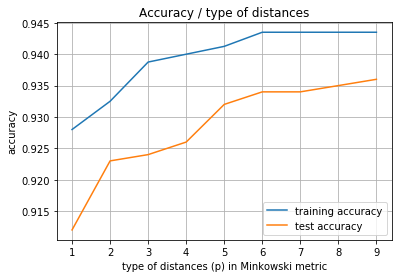

<Figure size 432x288 with 0 Axes>

In [0]:
## PLOT
fig, ax = plt.subplots()
ax.plot(np.arange(1,10,1), training_scores, label = "training accuracy")
ax.plot(np.arange(1,10,1), test_scores, label = "test accuracy" )

ax.set(xlabel='type of distances (p) in Minkowski metric', ylabel='accuracy',
       title='Accuracy / type of distances')
ax.grid()
plt.legend(loc='best')
plt.show()
plt.savefig('TP1-acc-vs-minkowski-p.png')

In [0]:
%%time 

neighbors_settings = np.arange(2,16,1)
minkowski_test_accuracies = []
manhattan_test_accuracies = []
euclidean_test_accuracies = []
chebyshev_test_accuracies = []

for n_neighbors in neighbors_settings :
    print("n_neigbors = ",n_neighbors,"...")
    clf = KNNs(n_neighbors,p=3,metric='minkowski')
    clf.fit(X_train,y_train)
    minkowski_test_accuracies.append(clf.score(X_test,y_test))

    clf = KNNs(n_neighbors,metric='manhattan')
    clf.fit(X_train,y_train)
    manhattan_test_accuracies.append(clf.score(X_test,y_test))
    
    clf = KNNs(n_neighbors,metric='euclidean')
    clf.fit(X_train,y_train)
    euclidean_test_accuracies.append(clf.score(X_test,y_test))

    clf = KNNs(n_neighbors,metric='chebyshev')
    clf.fit(X_train,y_train)
    chebyshev_test_accuracies.append(clf.score(X_test,y_test))

n_neigbors =  2 ...
n_neigbors =  3 ...
n_neigbors =  4 ...
n_neigbors =  5 ...
n_neigbors =  6 ...
n_neigbors =  7 ...
n_neigbors =  8 ...
n_neigbors =  9 ...
n_neigbors =  10 ...
n_neigbors =  11 ...
n_neigbors =  12 ...
n_neigbors =  13 ...
n_neigbors =  14 ...
n_neigbors =  15 ...
CPU times: user 26min 45s, sys: 244 ms, total: 26min 45s
Wall time: 26min 47s


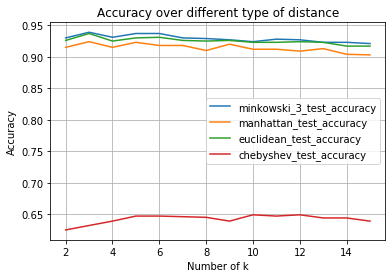

In [0]:
## PLOT
plt.plot(neighbors_settings, minkowski_test_accuracies, label = "minkowski_3_test_accuracy")
plt.plot(neighbors_settings, manhattan_test_accuracies, label = "manhattan_test_accuracy")
plt.plot(neighbors_settings, euclidean_test_accuracies, label = "euclidean_test_accuracy")
plt.plot(neighbors_settings, chebyshev_test_accuracies, label = "chebyshev_test_accuracy")

plt.ylabel("Accuracy")
plt.xlabel("Number of k")
plt.legend(loc='best')
plt.title("Accuracy over different type of distance")
plt.grid()
plt.savefig('TP1-acc-vs-metrics.png')

### ***3.6. n_jobs in KNN***

**Case n_jobs = 1**

In [0]:
%%time
X_train, X_test, y_train, y_test = train_test_split(data,labels,train_size =0.8)
print("Traning data shape : ", X_train.shape,"Traning target shape : ", y_train.shape)
print("Testing data shape : ", X_test.shape,"Testing target shape : ", y_test.shape)
n_neighbors = 10
clf = KNNs(n_neighbors,n_jobs = 1)
start = time.clock()
print("Fitting model...")
clf.fit(X_train,y_train)
end_train = time.clock()
print("Training time : ",end_train-start)
print("Predicting...")
y_pred = clf.predict(X_test)
end_pred = time.clock()
print("Predicting time: ",end_pred-end_train)
print("Training score : ",clf.score(X_train,y_train))
print("Test score : ",clf.score(X_test,y_test))
print("Total execution time : ",time.clock()-start)

Traning data shape :  (4000, 784) Traning target shape :  (4000,)
Testing data shape :  (1000, 784) Testing target shape :  (1000,)
Fitting model...
Training time :  0.105810000000929
Predicting...
Predicting time:  5.892133999999714
Training score :  0.93
Test score :  0.935
Total execution time :  35.353516999999556
CPU times: user 35.3 s, sys: 25 ms, total: 35.4 s
Wall time: 35.4 s


**Case n_jobs = -1**

In [0]:
%%time
X_train, X_test, y_train, y_test = train_test_split(data,labels,train_size =0.8)
print("Traning data shape : ", X_train.shape,"Traning target shape : ", y_train.shape)
print("Testing data shape : ", X_test.shape,"Testing target shape : ", y_test.shape)
n_neighbors = 10
clf = KNNs(n_neighbors,n_jobs = -1)
start = time.clock()
print("Fitting model...")
clf.fit(X_train,y_train)
end_train = time.clock()
print("Training time : ",end_train-start)
print("Predicting...")
y_pred = clf.predict(X_test)
end_pred = time.clock()
print("Predicting time: ",end_pred-end_train)
print("Training score : ",clf.score(X_train,y_train))
print("Test score : ",clf.score(X_test,y_test))
print("Total execution time : ",time.clock()-start)

Traning data shape :  (4000, 784) Traning target shape :  (4000,)
Testing data shape :  (1000, 784) Testing target shape :  (1000,)
Fitting model...
Training time :  0.10275700000056531
Predicting...
Predicting time:  9.089850000000297
Training score :  0.92975
Test score :  0.934
Total execution time :  55.13343700000041
CPU times: user 55.1 s, sys: 42 ms, total: 55.1 s
Wall time: 28.3 s


## **4. Best model ?**

**From the above explorations, we choose parameters for a KNN Classifier:**

* n_neighbors = 3
* p = 3
* metrics = 'minkowski'

### ***Hyper-parameter optimization using GridSearchCV***


**Attention :** This block will take a long time to finish....

In [0]:
# %%time
# # Prepare again dataset
# X_train, X_test, y_train, y_test = train_test_split(mnist.data,mnist.target,train_size =0.8)


# ## Choose a classifier
# knn = KNNs()

# ## Define a hyper-parameter space to search
# parameter_space = {
#     'n_neighbors': [1,3], #,5,11,101],
#     'p' : [1,2,3] #,4,5]
# }

# ## Run the search, using cross-validation with 3-fold
# clf = GridSearchCV(knn, parameter_space, n_jobs=-1, cv=3)
# clf.fit(X_train, y_train)

# ## Print best parameter set 
# print('Best parameters found:\n', clf.best_params_)

# ## Print all results 
# means = clf.cv_results_['mean_test_score']
# stds = clf.cv_results_['std_test_score']
# for mean, std, params in zip(means, stds, clf.cv_results_['params']):
#     print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

-----

